<a href="https://colab.research.google.com/github/conjurer2306/Data-analysis-on-goodreads-books-dataset/blob/master/Queries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing packages required
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading csv file
df = pd.read_csv("books.csv",  error_bad_lines = False)
print("The data contains {0} Rows and {1} Columns".format(df.shape[0],df.shape[1]))
df.head()

The data contains 13714 Rows and 10 Columns


b'Skipping line 4012: expected 10 fields, saw 11\nSkipping line 5688: expected 10 fields, saw 11\nSkipping line 7056: expected 10 fields, saw 11\nSkipping line 10601: expected 10 fields, saw 11\nSkipping line 10668: expected 10 fields, saw 11\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


7600


,title
authors,
J.R.R. Tolkien,31
Dan Simmons,32
Margaret Weis-Tracy Hickman,33
Piers Anthony,34
Terry Brooks,40
P.G. Wodehouse,42
Rumiko Takahashi,46
Orson Scott Card,48
Stephen King,66


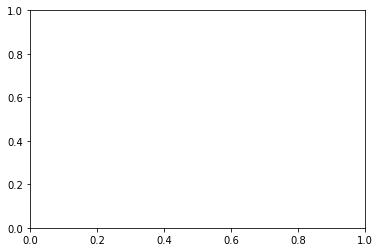

In [4]:
#Number of authors
allAuthors = df.authors.unique()
fig, ax = plt.subplots()
y_pos = np.arange(len(allAuthors))

print(len(allAuthors))
# finding out the top 10 authors who wrote the most number of books
top10Authors = df[['authors', 'title']].groupby(['authors']).count()
top10Authors = top10Authors.sort_values(by=['title'], ascending=True)
top10Authors = top10Authors.tail(10)
top10Authors

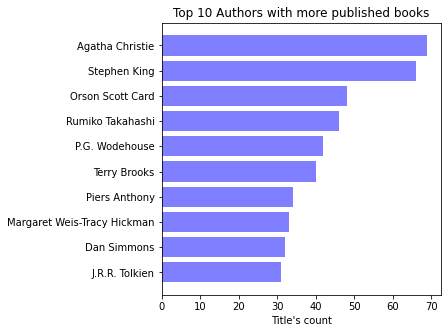

In [5]:
plt.figure(figsize=(5, 5))
y_NoTitles = top10Authors['title']
plt.barh(top10Authors.index.values, y_NoTitles, 0.8, align='center', alpha=0.5, color = 'blue')
plt.xlabel('Title\'s count')
plt.title('Top 10 Authors with more published books')
plt.yticks(top10Authors.index.values, top10Authors.index.values)
plt.show()

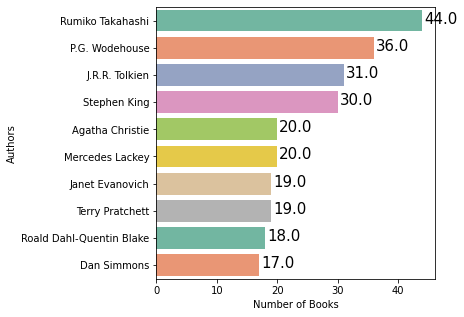

In [6]:
# finding out the top 10 highly rated and the bottom 5 poorly rated authors
GoodRating = 4
GoodRatedAuthors = df[df['average_rating']>=GoodRating]
GoodRatedAuthors = GoodRatedAuthors.groupby('authors')['title'].count().reset_index().sort_values('title', ascending = False).head(10).set_index('authors')
plt.figure(figsize=(5,5))
ax = sns.barplot(GoodRatedAuthors['title'], GoodRatedAuthors.index, palette='Set2')
ax.set_xlabel("Number of Books")
ax.set_ylabel("Authors")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 15, color = 'k')
    
    
plt.show()

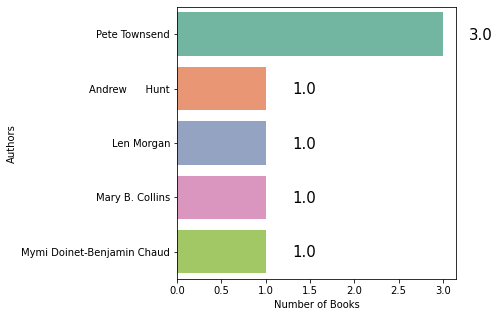

In [7]:
BadRating = 2
BadRatedAuthors = df[df['average_rating'] <= BadRating]
BadRatedAuthors = BadRatedAuthors.groupby('authors')['title'].count().reset_index().sort_values('title', ascending = False).head(5).set_index('authors')
plt.figure(figsize=(5,5))
ax = sns.barplot(BadRatedAuthors['title'], BadRatedAuthors.index, palette='Set2')
ax.set_xlabel("Number of Books")
ax.set_ylabel("Authors")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 15, color = 'k')
    
plt.show()

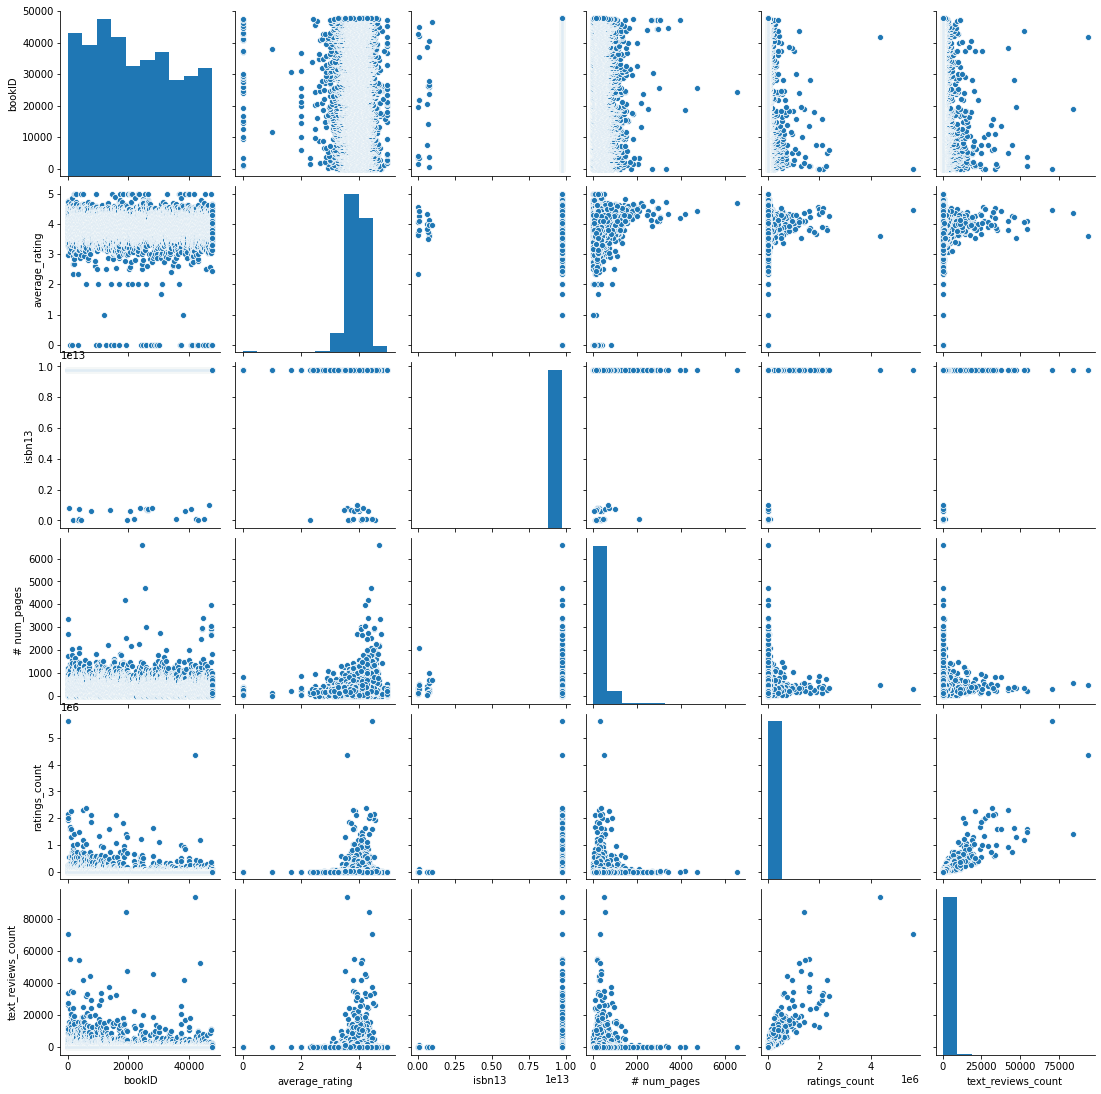

In [8]:
# checking for any correlated variables in the dataset
# ratings_count and text_reviews_count are highly correlated with Correlation Coefficient O.86
# exploring if ratings_count and text_reviews_count have influence on average_rating
sns.pairplot(df)
plt.show()

In [9]:
corr = df.corr()
corr

,bookID,average_rating,isbn13,# num_pages,ratings_count,text_reviews_count
bookID,1.000000,-0.042510,-0.001610,-0.012872,-0.081236,-0.087670
average_rating,-0.042510,1.000000,0.000453,0.167388,0.041234,0.036695
isbn13,-0.001610,0.000453,1.000000,-0.011723,0.004835,0.007260
# num_pages,-0.012872,0.167388,-0.011723,1.000000,0.028408,0.034171
ratings_count,-0.081236,0.041234,0.004835,0.028408,1.000000,0.863467
text_reviews_count,-0.087670,0.036695,0.007260,0.034171,0.863467,1.000000


<Figure size 360x360 with 0 Axes>

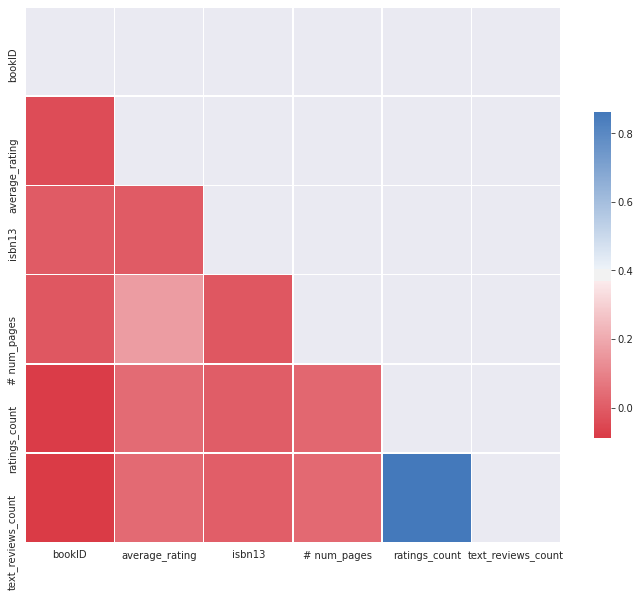

In [11]:
plt.figure(figsize=(5,5))

# Exclude duplicate correlations by masking uper right values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set background color / chart style
sns.set_style(style = 'dark')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

sns.heatmap(corr, mask = mask, cmap=cmap, square=True, linewidths=0.5, cbar_kws={"shrink": .5}, ax=ax)

plt.show()

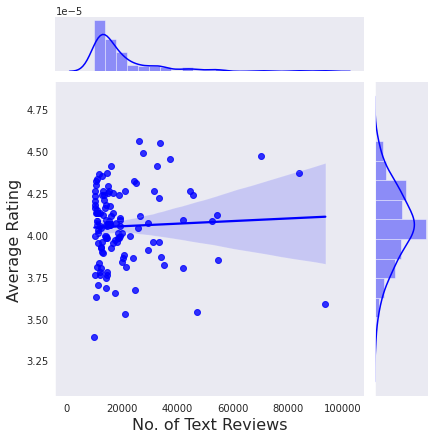

In [12]:
# generating pattern between ratings vs higher ratings
data_TextReviewsGreaterThan10K = df[df['text_reviews_count'] > 10000]
ax = sns.jointplot(x="text_reviews_count", y="average_rating", data = data_TextReviewsGreaterThan10K, kind = 'reg', color = 'blue')
ax.set_axis_labels("No. of Text Reviews", "Average Rating", fontsize=16)
plt.show()

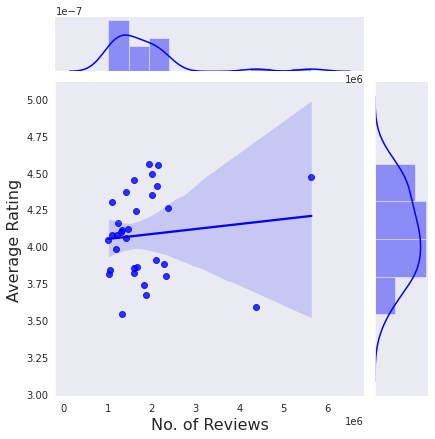

In [13]:
# generating pattern between ratings vs review count
data_ReviewsGreaterThan1Million = df[df['ratings_count'] > 1000000]
ax = sns.jointplot(x="ratings_count", y="average_rating", data = data_ReviewsGreaterThan1Million, kind = 'reg', color = 'blue')
ax.set_axis_labels("No. of Reviews", "Average Rating",fontsize=16)
plt.show()

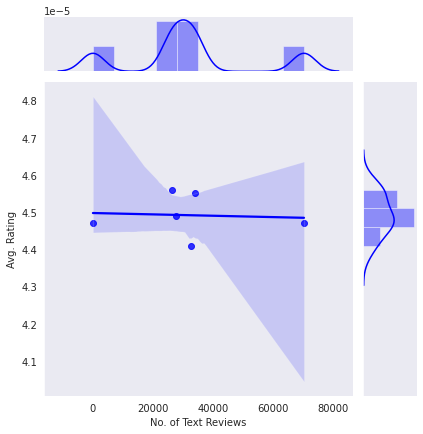

,title,authors,isbn13,average_rating,# num_pages,ratings_count,text_reviews_count
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,9780439785969,4.56,652,1944099,26249
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,9780439358071,4.49,870,1996446,27613
2,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,9780439554930,4.47,320,5629932,70390
4,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,9780439655484,4.55,435,2149872,33964
5300,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling-Mary GrandPré,9780439064866,4.41,341,2115562,32694
10540,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,9780786222728,4.47,424,132,12


In [14]:
# checking the rating trend of Harry Potter series by J.K.Rowling on Goodreads 
author_df = df[df['authors']=='J.K. Rowling-Mary GrandPré']
author_df = author_df[author_df['language_code']=='eng']
author_df = author_df[['title', 'authors', 'isbn13', 'average_rating', '# num_pages', 'ratings_count', 'text_reviews_count']]

author_df2 = author_df[~(author_df['title'].str.contains('Boxed Set'))]
ax = sns.jointplot(x="text_reviews_count", y="average_rating", data = author_df2, kind = 'reg', color = 'blue')
ax.set_axis_labels("No. of Text Reviews", "Avg. Rating")
plt.show()
author_df2

In [15]:
#Extract the Volume number of the book using regular expression
author_df2['Volume'] = author_df2.title.str.extract("\((.*?)\)", expand=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
author_df2 = author_df2.sort_values(by=['Volume'])
author_df2

,title,authors,isbn13,average_rating,# num_pages,ratings_count,text_reviews_count,Volume
2,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,9780439554930,4.47,320,5629932,70390,Harry Potter #1
10540,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,9780786222728,4.47,424,132,12,Harry Potter #1
5300,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling-Mary GrandPré,9780439064866,4.41,341,2115562,32694,Harry Potter #2
4,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,9780439655484,4.55,435,2149872,33964,Harry Potter #3
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,9780439358071,4.49,870,1996446,27613,Harry Potter #5
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,9780439785969,4.56,652,1944099,26249,Harry Potter #6


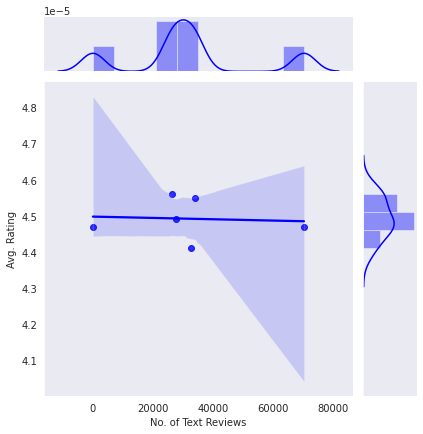

In [17]:
ax = sns.jointplot(x="text_reviews_count", y="average_rating", data = author_df2, kind = 'reg', color = 'blue')
ax.set_axis_labels("No. of Text Reviews", "Avg. Rating")
plt.show()

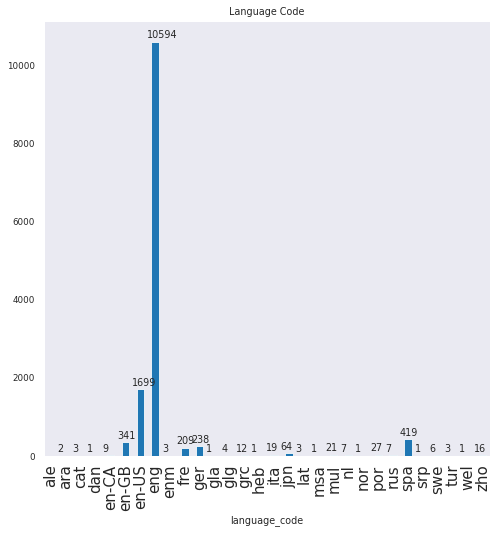

In [18]:
# book distribution based on their respective languages
sns.set_context('paper')
plt.figure(figsize=(8,8))
ax = df.groupby('language_code')['title'].count().plot.bar()
plt.title('Language Code')
plt.xticks(fontsize = 15)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.3, p.get_height()+100))
plt.show()

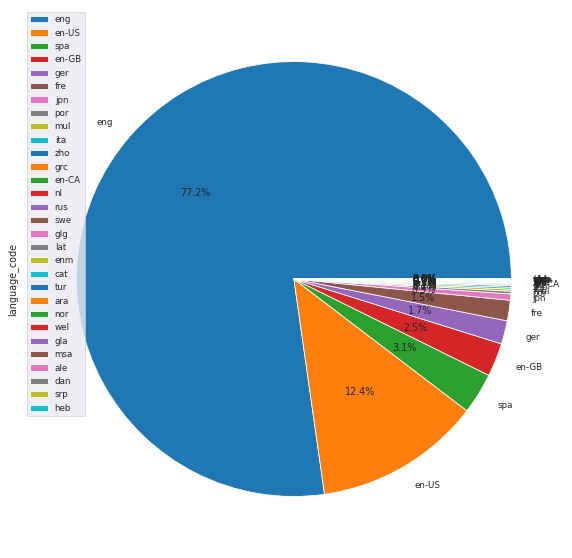

In [19]:
df['language_code'].value_counts().plot(kind = 'pie', figsize=(10, 10), autopct='%1.1f%%',).legend()
plt.show()

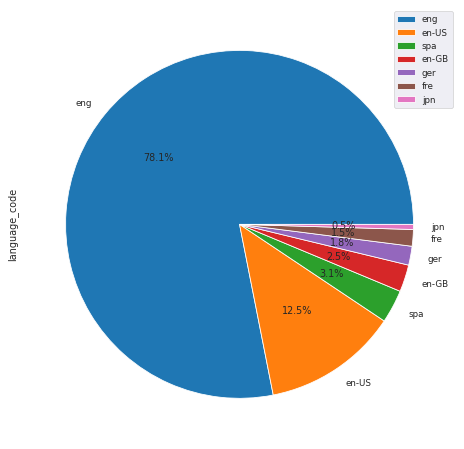

In [20]:
df['language_code'].value_counts().head(7).plot(kind = 'pie', figsize=(8, 8),autopct='%1.1f%%',).legend()
plt.show()